In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [29]:
powers = []

In [30]:
def normalize(df):
    new_df = df.copy()
    for col in df.columns:
        new_df[col] -= df[col].mean()
        new_df[col] /= df[col].std()
    return new_df

def transform(X, deg):
    for i in range(0, deg):
        for j in range(0, deg):
            if(i+j <= 6 and i+j >= 2):
                X[str(i) + ',' + str(j)] = X[0].pow(i) * X[1].pow(j)
                powers.append((i,j))
    return X

In [37]:
class LR:
    def __init__(self):
        self.costs = []
    
    def init_weights(self, num_features):
        return np.zeros(num_features)
                            
    
    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)
    
    def caculate_loss(self, a, y):
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(a)) - (1 - y).T.dot(np.log(1 - a))))
        return cost
        
    
    def fit(self, X, y, alpha=0.01, num_iterations=100, lamda=0.1):
        self.classes = np.unique(y)
        self.params = []
        X = self.add_bias(X)
        
        m = X.shape[0]
        
        for c in self.classes:
            each_costs = []
            y_onevsall = np.where(y == c, 1, 0)
            w = self.init_weights(X.shape[1])
                            
            for i in range(num_iterations):
                a = sigmoid(X.dot(w))
                dw = (1/m) * X.T.dot(a - y_onevsall) + w.sum()*lamda/m
#                 dw = (1/m) * X.T.dot(a - y_onevsall)
                w -= alpha * dw
                each_costs.append(self.caculate_loss(a, y_onevsall))
            self.costs.append(each_costs)
            self.params.append((c, w))
            

    def predict(self, X):
        X = self.add_bias(X)
        y_preds = []
        for x in X:
            one_vs_rest_preds = []
            for c, w in self.params:
                one_vs_rest_preds.append((sigmoid(x.dot(w)), c))
            y_preds.append(max(one_vs_rest_preds)[1])
        return y_preds
    
    def get_params(self):
        return [w for c,w in self.params]
    
    def get_costs(self):
        return self.costs



In [43]:
data = pd.read_csv('quality_test.csv', header=None)
X = data[[0,1]]
y = data[2]     

X = normalize(X)
X = transform(X, 7)

lr = LR()
lr.fit(X.to_numpy(), y.to_numpy(), alpha=0.01, num_iterations=1000, lamda=0.1)

print((lr.predict(X.to_numpy()) == y).sum() / len(y))

0.8305084745762712


In [44]:
X.shape

(118, 27)

In [45]:
groups = X.groupby(y)
columns = X.columns
X = X.to_numpy()
X = np.insert(X, 0, 1, axis=1)

Text(0, 0.5, 'feature 2')

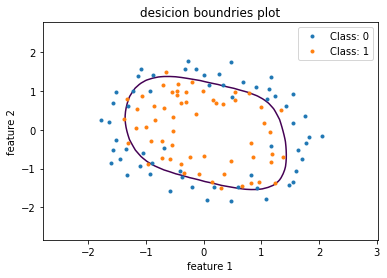

In [46]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group[0], group[1], marker=".", linestyle="", label='Class: ' + str(int(name)))
        
w = lr.get_params()[0]

plot_step = 0.1
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

x = transform(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]), 7).to_numpy()
x = np.insert(x, 0, 1, axis=1)
Z = x.dot(w)
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0])
ax.legend()
ax.set_title('desicion boundries plot')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')